In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse

In [21]:
from sklearn.impute import SimpleImputer as Imputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [22]:
ds = pd.read_csv("kaggle_houseprices_modified.csv")

In [4]:
ds

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,198075.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,199650.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,212325.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,237500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,166250.0
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,231000.0
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,253175.0
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,156337.5


In [5]:
ds.shape

(1460, 81)

In [6]:
ds.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,193784.766473
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,103896.507717
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,20940.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,139060.625000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,170500.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,223625.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,917485.500000


In [7]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [23]:
drop = ['Id']
categorical = ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
               'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'RoofStyle', 'RoofMatl', 'HouseStyle',
               'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'CentralAir',
               'Electrical', 'GarageType', 'PavedDrive', 'Fence', 'MiscFeature', 'MoSold', 'SaleType', 'SaleCondition']
continuous = ['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1',
              'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'MasVnrArea',
              'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
              'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 
              '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'YrSold', 'SalePrice']
cat_to_con = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 
              'HeatingQC', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageFinish', 'GarageQual', 'GarageCond',
              'PoolQC', ]

In [24]:
ds = ds.drop(columns=drop)

In [25]:
logical_nans = ['Alley', 'Fence', 'MiscFeature', 'MasVnrType', 'GarageType', ]
for col in logical_nans:
    ds[col] = ds[col].fillna('NA')
    
ds['Electrical'] = ds['Electrical'].fillna(ds['Electrical'].value_counts().index[0])  # most frequent value(mode)
print(ds[categorical].isna().sum().sum())

0


<Axes: ylabel='Frequency'>

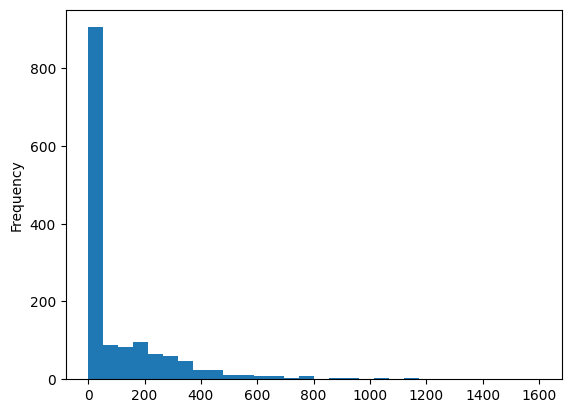

In [11]:
ds['MasVnrArea'].plot(kind='hist', bins=30)

In [26]:
ds['LotFrontage'] = ds['LotFrontage'].fillna(ds['LotFrontage'].median())
ds['MasVnrArea']  = ds['MasVnrArea'].fillna(ds['MasVnrArea'].median())
ds['GarageYrBlt'] = ds['GarageYrBlt'].fillna(ds['GarageYrBlt'].mean())
print(ds[continuous].isna().sum().sum())

0


In [27]:
ds['FireplaceQu'] = ds['FireplaceQu'].fillna('NA')

logical_nans = ['FireplaceQu', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 
                'BsmtFinType2', 'GarageFinish', 'GarageQual', 'GarageCond']
for col in logical_nans:
    ds[col] = ds[col].fillna('NA')

In [28]:
ds.drop(columns = ['PoolQC'], inplace=True)
cat_to_con.remove('PoolQC')

In [30]:
ds[cat_to_con].isna().sum().sum()

0

In [31]:
target = 'SalePrice'
for col in categorical:
    ds[col] = ds.groupby([col])[target].transform('mean')

In [32]:
for col in cat_to_con:
    print(col, ds[col].unique())

ExterQual ['Gd' 'TA' 'Ex' 'Fa']
ExterCond ['TA' 'Gd' 'Fa' 'Po' 'Ex']
BsmtQual ['Gd' 'TA' 'Ex' 'NA' 'Fa']
BsmtCond ['TA' 'Gd' 'NA' 'Fa' 'Po']
BsmtExposure ['No' 'Gd' 'Mn' 'Av' 'NA']
BsmtFinType1 ['GLQ' 'ALQ' 'Unf' 'Rec' 'BLQ' 'NA' 'LwQ']
BsmtFinType2 ['Unf' 'BLQ' 'NA' 'ALQ' 'Rec' 'LwQ' 'GLQ']
HeatingQC ['Ex' 'Gd' 'TA' 'Fa' 'Po']
KitchenQual ['Gd' 'TA' 'Ex' 'Fa']
Functional ['Typ' 'Min1' 'Maj1' 'Min2' 'Mod' 'Maj2' 'Sev']
FireplaceQu ['NA' 'TA' 'Gd' 'Fa' 'Ex' 'Po']
GarageFinish ['RFn' 'Unf' 'Fin' 'NA']
GarageQual ['TA' 'Fa' 'Gd' 'NA' 'Ex' 'Po']
GarageCond ['TA' 'Fa' 'NA' 'Gd' 'Po' 'Ex']


In [33]:
grp1 = ['GarageQual', 'GarageCond', 'FireplaceQu', 'KitchenQual', 'HeatingQC', 'BsmtCond', 'BsmtQual', 'ExterCond', 'ExterQual']
for col in grp1:
    ds[col] = ds[col].map({'TA': 3, 'Fa': 2, 'NA': 0, 'Gd': 4, 'Po': 1, 'Ex': 5})
    
for col in ['BsmtFinType1', 'BsmtFinType2']:
    ds[col] = ds[col].map({'GLQ':6, 'ALQ':5, 'Unf':1, 'Rec':3, 'BLQ':4, 'NA':0, 'LwQ':2})

ds['BsmtExposure'] = ds['BsmtExposure'].map({'No':1, 'Gd':4, 'Mn':2, 'Av':3, 'NA':0})
ds['Functional'] = ds['Functional'].map({'Typ':7, 'Min1':6, 'Maj1':3, 'Min2':5, 'Mod':4, 'Maj2':2, 'Sev':1, 'Sal':0})
ds['GarageFinish'] = ds['GarageFinish'].map({'RFn':2, 'Unf':1, 'Fin':3, 'NA':0})

In [34]:
ds.isna().sum().sum()

0

In [35]:
scaler = StandardScaler()
ds_scaled = scaler.fit_transform(ds)

In [36]:
X = ds_scaled[:, :-1]
y = ds['SalePrice'].values

kf = KFold(n_splits=5)
# cross_val_score

mses = []
mapes = []
n = 0

y_true, y_pred = np.array([]), np.array([])
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    baseline_estimator = GradientBoostingRegressor(random_state=0)
    baseline_estimator.fit(X_train, y_train)
    y_true = np.append(y_true, y_test)
    y_pred = np.append(y_pred, baseline_estimator.predict(X_test))

print(mse(y_true, y_pred)**0.5)

31247.553546371884


In [37]:
X = ds_scaled[:, :-1]
y = ds['SalePrice'].values

kf = KFold(n_splits=5)
# cross_val_score

mses = []
mapes = []
n = 0

y_true, y_pred = np.array([]), np.array([])
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    baseline_estimator = RandomForestRegressor(random_state=0)
    baseline_estimator.fit(X_train, y_train)
    y_true = np.append(y_true, y_test)
    y_pred = np.append(y_pred, baseline_estimator.predict(X_test))

print(mse(y_true, y_pred)**0.5)

35876.693436863476


In [38]:
from sklearn.decomposition import PCA

In [39]:
ds_scaled[:, :-1].shape

(1460, 78)

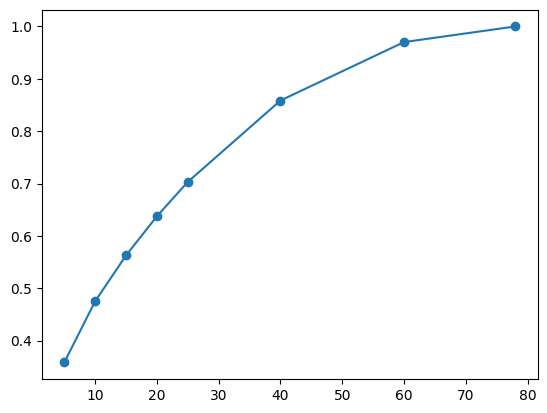

In [40]:
cs = [5, 10, 15, 20, 25, 40, 60,78]
info = []
for i in cs:
    pca = PCA(n_components=i)
    vis = pca.fit_transform(ds_scaled[:, :-1])
    info.append(pca.explained_variance_ratio_.sum())
    
plt.plot(cs, info, '-o')

In [42]:
pca = PCA(n_components=60)

Xpca = pca.fit_transform(ds_scaled[:, :-1])
y = ds['SalePrice']

kf = KFold(n_splits=5)

mses = []
mapes = []
n = 0

y_true, y_pred = np.array([]), np.array([])
for train_index, test_index in kf.split(Xpca):
    X_train, X_test = Xpca[train_index], Xpca[test_index]
    y_train, y_test = y[train_index], y[test_index]
    baseline_estimator = GradientBoostingRegressor(random_state=0)
    baseline_estimator.fit(X_train, y_train)
    y_true = np.append(y_true, y_test)
    y_pred = np.append(y_pred, baseline_estimator.predict(X_test))

print(mse(y_true, y_pred)**0.5)

35610.7040114256


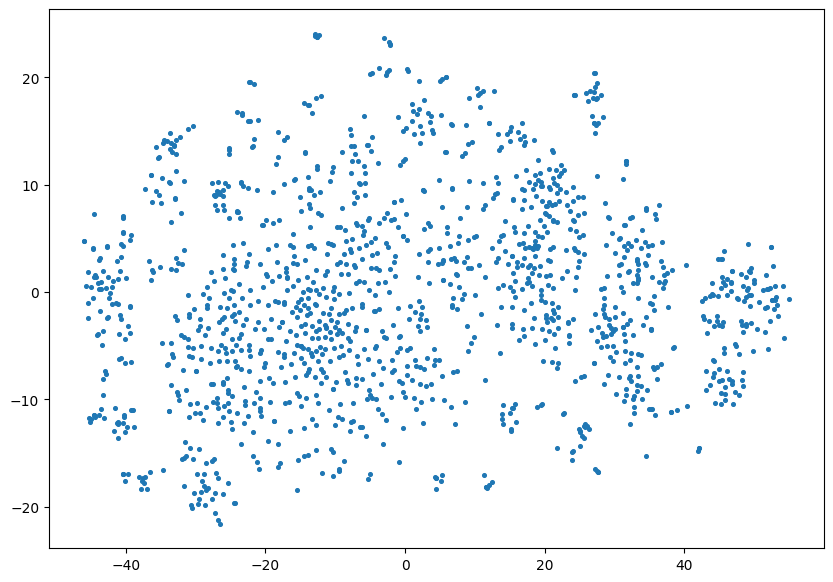

In [45]:
from sklearn.manifold import TSNE

plt.figure(figsize=(10,7))
pca = TSNE(n_components=2, perplexity=50, random_state=0)
vis = pca.fit_transform(ds_scaled[:, :-1])
plt.scatter(vis[:,0], vis[:,1], s=7)

In [46]:
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import IsolationForest

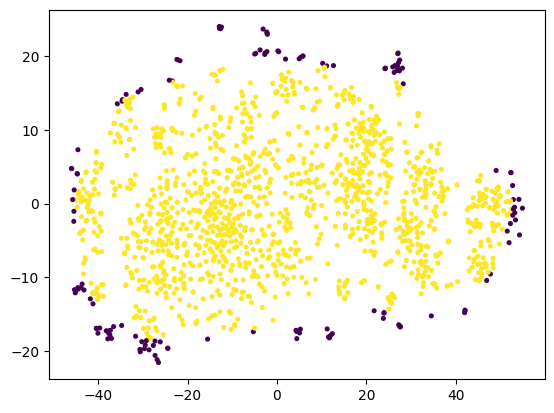

In [47]:
is_outlier = IsolationForest(contamination = 0.1, random_state=0, n_estimators=1000).fit_predict(vis)
plt.scatter(vis[:,0], vis[:,1], s=7, c=is_outlier)
plt.show()

In [49]:
vis.shape

(1460, 2)

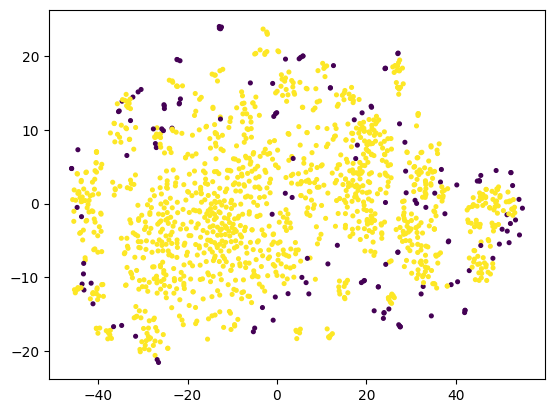

In [48]:

is_outlier = LocalOutlierFactor(n_neighbors=5, contamination=0.1).fit_predict(vis)
plt.scatter(vis[:,0], vis[:,1], s=7, c=is_outlier)
plt.show()

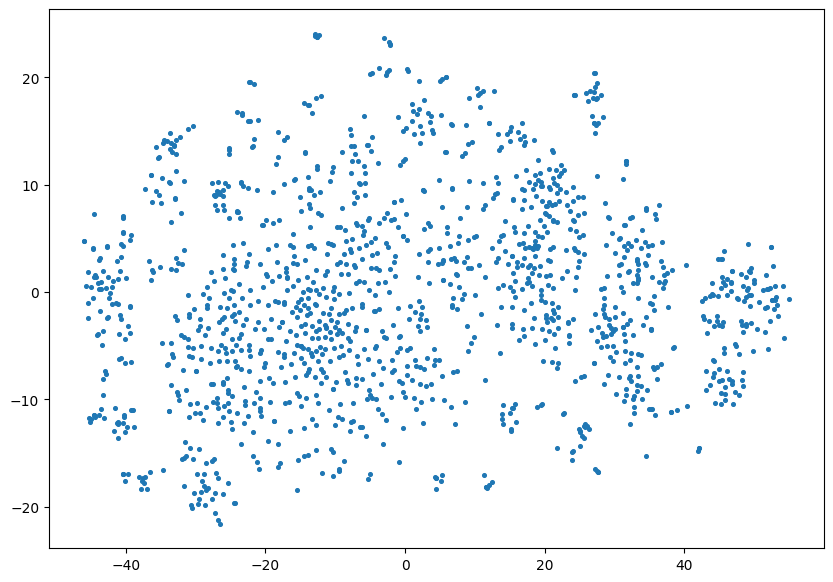

In [50]:
plt.figure(figsize=(10,7))
plt.scatter(vis[:,0], vis[:,1], s=7)

c:\Users\SHARIQ\miniconda3\envs\python3_8\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\SHARIQ\miniconda3\envs\python3_8\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\SHARIQ\miniconda3\envs\python3_8\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\SHARIQ\miniconda3\envs\python3_8\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default valu

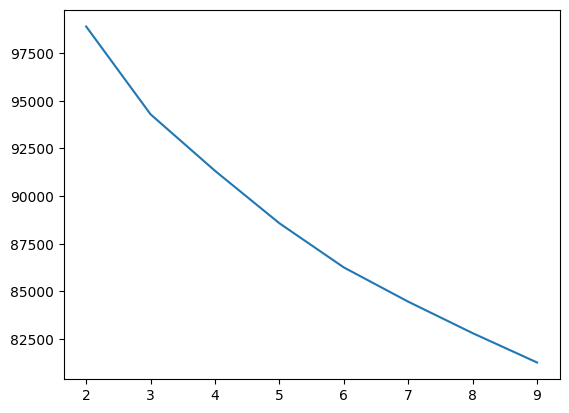

In [51]:
from sklearn.cluster import KMeans

elbow = []
for k in range(2,10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(ds_scaled[:, :-1])
    elbow.append(kmeans.inertia_)
    
plt.plot(range(2,10), elbow)

c:\Users\SHARIQ\miniconda3\envs\python3_8\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\SHARIQ\miniconda3\envs\python3_8\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\SHARIQ\miniconda3\envs\python3_8\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\SHARIQ\miniconda3\envs\python3_8\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default valu

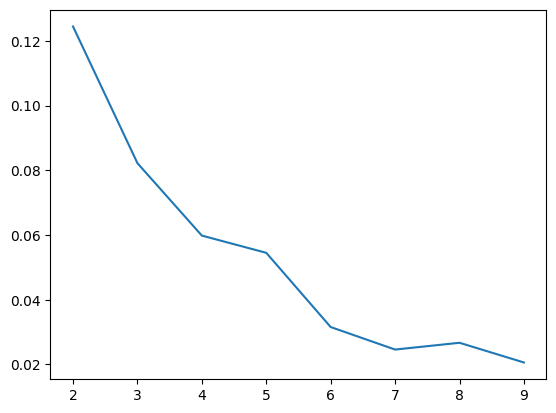

In [52]:
from sklearn.metrics import silhouette_score

elbow = []
for k in range(2,10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(ds)
    elbow.append(silhouette_score(ds_scaled[:, :-1], kmeans.labels_))
    
plt.plot(range(2,10), elbow)

c:\Users\SHARIQ\miniconda3\envs\python3_8\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


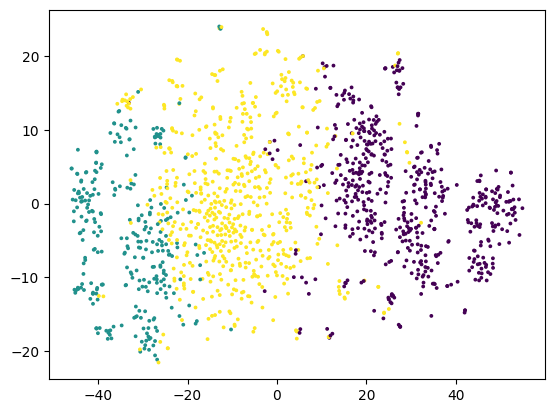

In [54]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(ds_scaled[:, :-1])
# kmeans.fit(vis)

plt.scatter(vis[:,0], vis[:,1], s=3, c=kmeans.labels_)

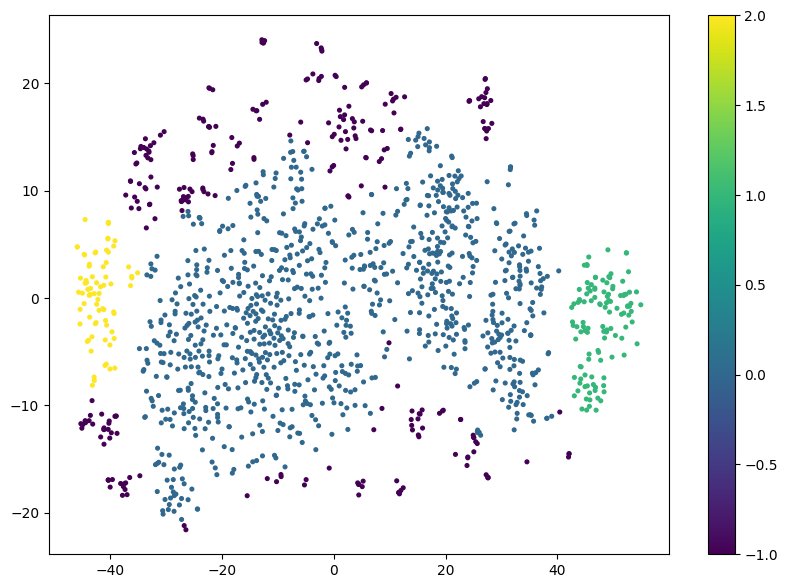

In [61]:
from sklearn.cluster import DBSCAN
dbsc = DBSCAN(eps = 5.4, min_samples = 45).fit(vis)
plt.figure(figsize=(10,7))
plt.scatter(vis[:,0], vis[:,1], s=7, c=dbsc.labels_)
plt.colorbar()

In [62]:
clusters = pd.Series(dbsc.labels_)
clusters.value_counts()

 0    1000
-1     272
 1     114
 2      74
Name: count, dtype: int64